In [33]:
import numpy as np
import random



liste = ['Felix', 'Sascha', 'gloria', 'Robin', 'Romy','Joel']
np.random.shuffle(liste)

In [34]:
liste

['Romy', 'Sascha', 'gloria', 'Robin', 'Felix', 'Joel']

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
mem = pd.read_csv("mem.tsv",sep="\t")

In [11]:
mem.head()

,hostname,interval,timestamp,kbmemfree,kbavail,kbmemused,%memused,kbbuffers,kbcached,kbcommit,%commit,kbactive,kbinact,kbdirty
0,gaia2,60,2024-03-01 09:45:27 UTC,137037152,230075116,31003076,11.74,636204,89877820,171802324,41.85,20851076,97457904,184
1,gaia2,60,2024-03-01 09:46:27 UTC,138041912,231080832,30002400,11.36,636328,89874808,161479612,39.33,20894252,96386512,576
2,gaia2,60,2024-03-01 09:47:27 UTC,138006124,231045812,30024476,11.37,636420,89888768,162125444,39.49,20894752,96423336,120
3,gaia2,60,2024-03-01 09:48:27 UTC,137958872,230999448,30071096,11.39,636504,89888952,171039472,41.66,20894832,96508840,3272
4,gaia2,60,2024-03-01 09:49:27 UTC,137909188,230950336,30120168,11.41,636592,89888964,171062608,41.67,20894932,96569740,212


In [12]:
cpu = pd.read_csv("cpu.tsv",sep="\t")
cpu.head()

,hostname,interval,timestamp,CPU,%user,%nice,%system,%iowait,%steal,%idle
0,gaia2,60,2024-03-01 09:45:27 UTC,-1,1.05,0.0,2.62,0.09,0.0,96.23
1,gaia2,60,2024-03-01 09:46:27 UTC,-1,1.33,0.0,2.92,0.16,0.0,95.60
2,gaia2,60,2024-03-01 09:47:27 UTC,-1,1.47,0.0,2.98,0.16,0.0,95.38
3,gaia2,60,2024-03-01 09:48:27 UTC,-1,1.65,0.0,3.25,0.09,0.0,95.01
4,gaia2,60,2024-03-01 09:49:27 UTC,-1,1.05,0.0,2.42,0.06,0.0,96.47


In [13]:
sorted = cpu.sort_values(["%user", "hostname"], ascending = [False, False])
sorted.head()


,hostname,interval,timestamp,CPU,%user,%nice,%system,%iowait,%steal,%idle
305885,uranus2,60,2024-03-01 09:55:14 UTC,-1,76.90,0.0,0.08,0.00,0.0,23.02
309344,uranus2,60,2024-03-03 19:34:54 UTC,-1,68.65,0.0,0.09,0.08,0.0,31.18
305886,uranus2,60,2024-03-01 09:56:14 UTC,-1,65.68,0.0,0.10,0.00,0.0,34.22
305887,uranus2,60,2024-03-01 09:57:14 UTC,-1,56.79,0.0,0.09,0.00,0.0,43.12
305888,uranus2,60,2024-03-01 09:58:14 UTC,-1,54.70,0.0,0.10,0.00,0.0,45.21


In [14]:
uranus2 =  cpu[cpu["hostname"]=="uranus2"]
uranus2.tail()

,hostname,interval,timestamp,CPU,%user,%nice,%system,%iowait,%steal,%idle
346225,uranus2,60,2024-03-29 10:16:05 UTC,-1,0.03,0.0,0.01,0.0,0.0,99.97
346226,uranus2,60,2024-03-29 10:17:05 UTC,-1,0.01,0.0,0.01,0.0,0.0,99.98
346227,uranus2,60,2024-03-29 10:18:05 UTC,-1,0.01,0.0,0.01,0.0,0.0,99.98
346228,uranus2,60,2024-03-29 10:19:05 UTC,-1,0.01,0.0,0.01,0.0,0.0,99.98
346229,uranus2,60,2024-03-29 10:20:05 UTC,-1,0.01,0.0,0.00,0.0,0.0,99.98


In [15]:
mean_usage = uranus2["%user"].mean()
print(mean_usage)

0.44869946709629444


In [16]:
list_hostnames = np.unique(cpu["hostname"])
print(list_hostnames)

['gaia2' 'gaia3' 'gaia4' 'gaia5' 'jupiter' 'jupiter4' 'jupiter5' 'saturn2'
 'uranus2']


In [23]:
cpu[cpu["hostname"]=='gaia2']["%user"].mean()

1.0927676061688063

In [24]:
usage_list=[]
for hostname in list_hostnames:
    
    usage_list.append(cpu[cpu["hostname"]==hostname]["%user"].mean())
    



In [25]:
print(usage_list)

[1.0927676061688063, 1.2852238355268124, 0.8303516677155444, 4.063075819362634, 0.2556233854520734, 0.06360919229730251, 0.1664052271374727, 0.12612141192801546, 0.44869946709629444]


Text(0.5, 1.0, 'Mean usage percentage per host')

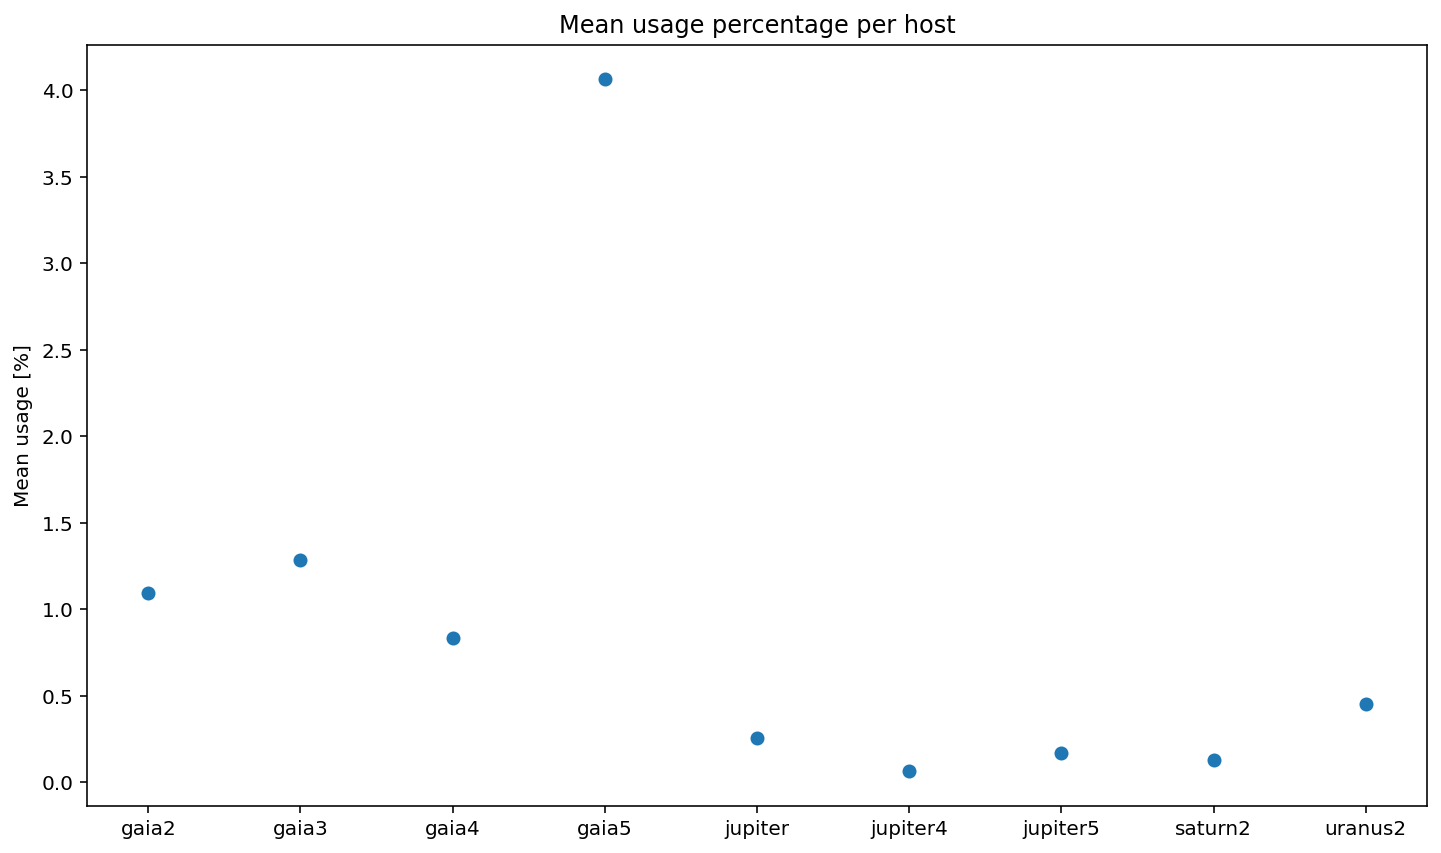

In [30]:
plt.scatter(list_hostnames, usage_list)
plt.ylabel("Mean usage [%]")
plt.title("Mean usage percentage per host")